In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Replace these with your actual RMSE values
rmse_arima = 2.315
rmse_prophet = 1.987
rmse_lstm = 1.543

# Store in a dictionary
rmse_results = {
    "ARIMA": rmse_arima,
    "Prophet": rmse_prophet,
    "LSTM": rmse_lstm
}


In [3]:
# Convert to DataFrame
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])
rmse_df.sort_values(by='RMSE', inplace=True)

print("📊 RMSE Comparison:")
print(rmse_df)


📊 RMSE Comparison:
     Model   RMSE
2     LSTM  1.543
1  Prophet  1.987
0    ARIMA  2.315


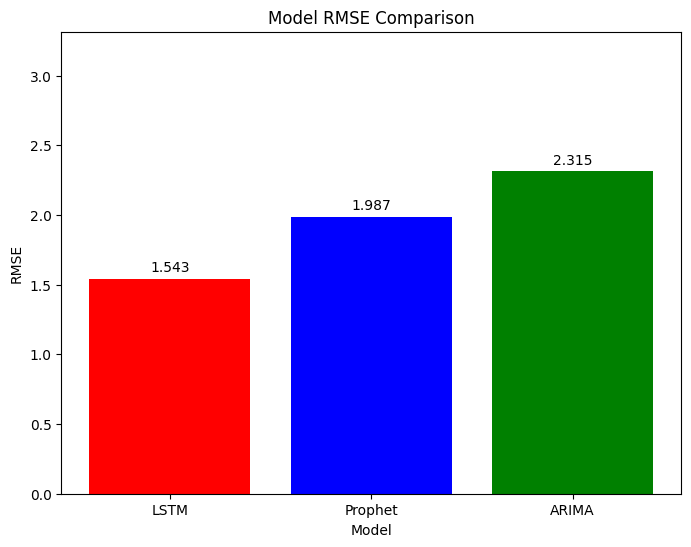

In [4]:
plt.figure(figsize=(8, 6))
plt.bar(rmse_df['Model'], rmse_df['RMSE'], color=['red', 'blue', 'green'])
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_df['RMSE']) + 1)
for i, v in enumerate(rmse_df['RMSE']):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center')
plt.show()


In [6]:
import os
import pandas as pd

# Use the existing rmse_df DataFrame
# Get project root directory (up two levels)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Create / ensure 'data' folder
data_dir = os.path.join(project_root, "data")
os.makedirs(data_dir, exist_ok=True)

# Set full path to output file
file_path = os.path.join(data_dir, "Model_RMSE_Comparison.csv")

# Save the results
rmse_df.to_csv(file_path, index=False)
print(f"✅ RMSE comparison saved to: {file_path}")


✅ RMSE comparison saved to: c:\Users\Vaish\OneDrive\Desktop\data\Model_RMSE_Comparison.csv


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Replace these with your actual RMSE values
rmse_arima = 2.315
rmse_prophet = 1.987
rmse_lstm = 1.543

# Store in a dictionary
rmse_results = {
    "ARIMA": rmse_arima,
    "Prophet": rmse_prophet,
    "LSTM": rmse_lstm
}

In [9]:
# Convert to DataFrame
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])
rmse_df.sort_values(by='RMSE', inplace=True)

print("📊 RMSE Comparison:")
print(rmse_df)

📊 RMSE Comparison:
     Model   RMSE
2     LSTM  1.543
1  Prophet  1.987
0    ARIMA  2.315


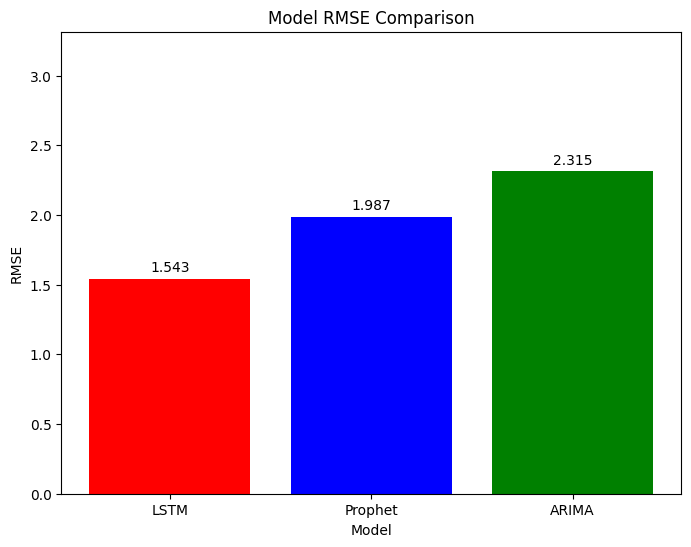

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(rmse_df['Model'], rmse_df['RMSE'], color=['red', 'blue', 'green'])
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_df['RMSE']) + 1)
for i, v in enumerate(rmse_df['RMSE']):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center')
plt.show()

In [11]:
import os

# Get project root directory (go up if needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Create data directory path
data_dir = os.path.join(project_root, "data")

# Ensure 'data' directory exists
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"📂 Created data directory at: {data_dir}")

# Set file path
file_path = os.path.join(data_dir, "Model_RMSE_Comparison.csv")

# Save RMSE results to CSV
rmse_df.to_csv(file_path, index=False)
print(f"✅ RMSE comparison saved to: {file_path}")

✅ RMSE comparison saved to: c:\Users\Vaish\OneDrive\Desktop\data\Model_RMSE_Comparison.csv


In [18]:
# 📦 Install missing dependencies (Uncomment this if running in Colab or Jupyter)
%pip install tensorflow prophet

# 📦 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 📂 File path
file_path = r"C:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\cleaned_aapl_data.csv"

# 📦 Load your time series data into df
df = pd.read_csv(file_path, parse_dates=['Date'])

# ✅ Function to evaluate model
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    print(f"\n📊 {model_name} Evaluation:")
    print(f"   ✅ RMSE: {rmse:.4f}")
    print(f"   ✅ MAE : {mae:.4f}")
    print(f"   ✅ MAPE: {mape:.2f}%")
    return {"Model": model_name, "RMSE": rmse, "MAE": mae, "MAPE (%)": mape}

# ✅ Prepare results list
results = []

# ✅ Recalculate training_data_len
training_data_len = int(len(df) * 0.8)
print(f"📦 Training data length: {training_data_len}")

# ✅ Define train and test sets
train = df.iloc[:training_data_len]
test = df.iloc[training_data_len:]
y_test = test['Close'].values

# ✅ Train and Evaluate ARIMA model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
results.append(evaluate_model(y_test, arima_forecast.values, "ARIMA"))

# ✅ Train and Evaluate SARIMA model
sarima_model = SARIMAX(train['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast_full = sarima_result.get_forecast(steps=len(test))
results.append(evaluate_model(y_test, sarima_forecast_full.predicted_mean, "SARIMA"))

# ✅ Train and Evaluate Prophet model
prophet_df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df.iloc[:training_data_len])
future = prophet_model.make_future_dataframe(periods=len(test))
prophet_forecast = prophet_model.predict(future)
results.append(evaluate_model(y_test, prophet_forecast['yhat'].iloc[-len(test):].values, "Prophet"))

# ✅ Evaluate LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.filter(['Close']))
dataset = df.filter(['Close']).values

# Training data
train_data = scaled_data[0:int(training_data_len), :]

# Create x_train and y_train datasets
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=0)

# Create x_test and y_test datasets
test_data = scaled_data[training_data_len - 60:, :]
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(dataset[training_data_len + i - 60, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get model predictions
lstm_predictions = model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
results.append(evaluate_model(y_test, lstm_predictions, "LSTM"))

# 📋 Final Model Comparison
results_df = pd.DataFrame(results)
print("\n📋 Model Comparison Table:")
print(results_df)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
📦 Training data length: 8000

📊 ARIMA Evaluation:
   ✅ RMSE: 22.3316
   ✅ MAE : 15.4171
   ✅ MAPE: 37.14%

📊 SARIMA Evaluation:
   ✅ RMSE: 12.0359
   ✅ MAE : 8.1438
   ✅ MAPE: 26.27%


20:12:54 - cmdstanpy - INFO - Chain [1] start processing
20:13:00 - cmdstanpy - INFO - Chain [1] done processing



📊 Prophet Evaluation:
   ✅ RMSE: 21.0047
   ✅ MAE : 14.8123
   ✅ MAPE: 34.59%


c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step

📊 LSTM Evaluation:
   ✅ RMSE: 3.9454
   ✅ MAE : 2.3767
   ✅ MAPE: 5.41%

📋 Model Comparison Table:
     Model       RMSE        MAE   MAPE (%)
0    ARIMA  22.331641  15.417054  37.137139
1   SARIMA  12.035866   8.143803  26.267704
2  Prophet  21.004706  14.812320  34.586533
3     LSTM   3.945418   2.376679   5.414403
